In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('dark')
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import zscore
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import PowerTransformer
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import GridSearchCV

import pickle
import warnings
warnings.filterwarnings('ignore')

In [141]:
mic = pd.read_csv('/Users/mitssverma/Documents/DataTrainned/Flip Robo/Dataset/Micro Credit Project/Data file.csv')
mic.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


## Features
- msisdn: mobile number of user
- aon: age on cellular network in days
- daily_decr30: Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- daily_decr90: Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- rental30: Average main account balance over last 30 days
- rental90: Average main account balance over last 90 days
- last_rech_date_ma: Number of days till last recharge of main account
- last_rech_date_da: Number of days till last recharge of data account
- last_rech_amt_ma: Amount of last recharge of main account (in Indonesian Rupiah)
- cnt_ma_rech30: Number of times main account got recharged in last 30 days
- fr_ma_rech30: Frequency of main account recharged in last 30 days
- sumamnt_ma_rech30: Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
- medianamnt_ma_rech30: Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
- medianmarechprebal30: Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- cnt_ma_rech90: Number of times main account got recharged in last 90 days
- fr_ma_rech90: Frequency of main account recharged in last 90 days
- sumamnt_ma_rech90: Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
- medianamnt_ma_rech90: Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
- medianmarechprebal90: Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- cnt_da_rech30: Number of times data account got recharged in last 30 days
- fr_da_rech30: Frequency of data account recharged in last 30 days
- cnt_da_rech90: Number of times data account got recharged in last 90 days
- fr_da_rech90: Frequency of data account recharged in last 90 days
- cnt_loans30: Number of loans taken by user in last 30 days
- amnt_loans30: Total amount of loans taken by user in last 30 days
- maxamnt_loans30: maximum amount of loan taken by the user in last 30 days
- medianamnt_loans30: Median of amounts of loan taken by the user in last 30 days
- cnt_loans90: Number of loans taken by user in last 90 days
- amnt_loans90: Total amount of loans taken by user in last 90 days
- maxamnt_loans90: maximum amount of loan taken by the user in last 90 days
- medianamnt_loans90: Median of amounts of loan taken by the user in last 90 days
- payback30: Average payback time in days over last 30 days
- payback90: Average payback time in days over last 90 days
- pcircle: telecom circle
- pdate: date

## Target
- label: Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

## EDA

In [142]:
mic.shape

(209593, 37)

Shape of our dataset is 209593, 37

In [143]:
mic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

**Information of the Dataset.**
- RangeIndex: 0 to 209592
- Data columns: 37
- dtypes: float64(21), int64(13), object(3)

In [144]:
mic.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,209593.0,104797.000000,60504.431823,1.000000,52399.000,104797.000000,157195.00,209593.000000
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000


**Short description of our dataset, this will give us the short summary of dataset**
- Counts
- Mean
- Standard deviation
- Minimum
- 1st quantile
- 2nd quantile
- 3rd quantile
- Maximum value of each columns.

**- Dropping unwanted columns.**

In [145]:
mic.drop(columns = ['Unnamed: 0','msisdn','pcircle','pdate'],axis = 1,inplace = True)

Dropped columns
- Unnamed: 0 --> Unnecessary Column.
- msisdn --> Object column & mobile number of user, which will not be needed.
- pcircle --> Object column & telecom circle and every one have same pcircle data i.e. UPW
- pdate --> Object column & date column, which will not be needed.

## Visualization

In [146]:
def plot(x,y,data):
    plt.scatter(x,y,data=mic)
    plt.xlabel(x)
    plt.ylabel(y)
    print('Scatterpot between',x,'and',y)
    plt.show()

Scatterpot between label and aon


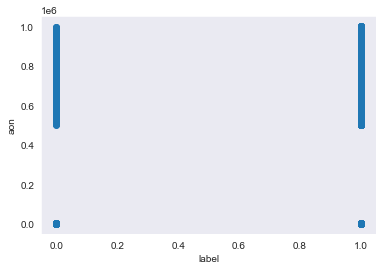

In [147]:
plot(x = 'label', y = 'aon', data = mic)

Both are equally distributed.

Scatterpot between label and daily_decr30


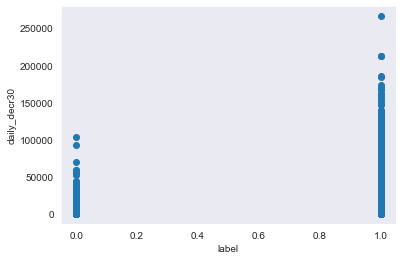

Scatterpot between label and daily_decr90


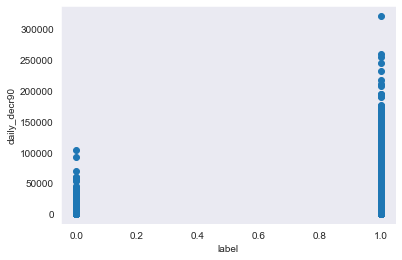

Scatterpot between daily_decr30 and daily_decr90


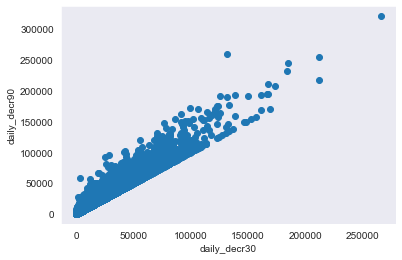

In [148]:
plot(x = 'label', y = 'daily_decr30', data = mic)
plot(x = 'label', y = 'daily_decr90', data = mic)
plot(x = 'daily_decr30', y = 'daily_decr90', data = mic)

Scatterpot between label and rental30


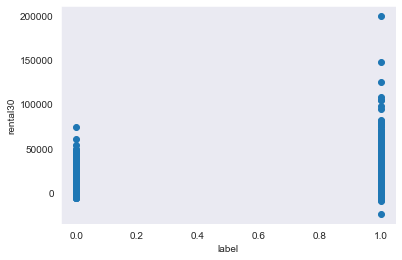

Scatterpot between label and rental90


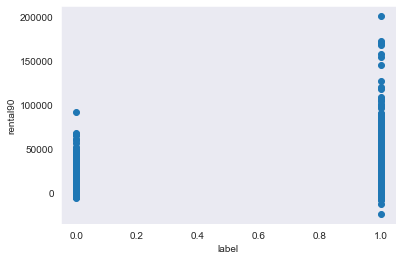

Scatterpot between rental30 and rental90


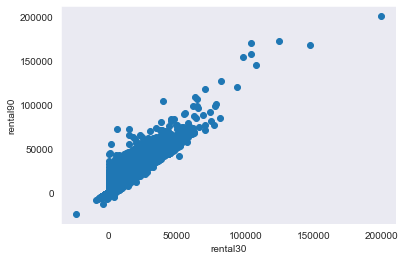

In [149]:
plot(x = 'label', y = 'rental30', data = mic)
plot(x = 'label', y = 'rental90', data = mic)
plot(x = 'rental30', y = 'rental90', data = mic)

Scatterpot between label and last_rech_date_ma


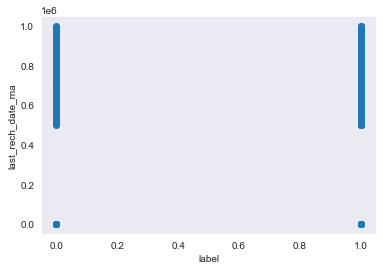

Scatterpot between label and last_rech_date_da


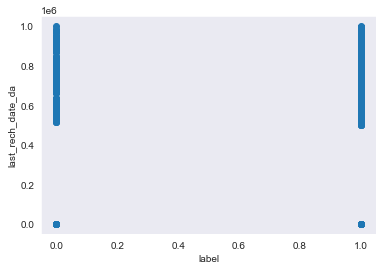

Scatterpot between label and last_rech_amt_ma


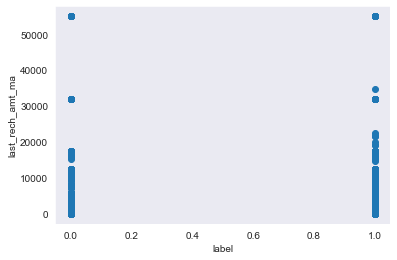

In [150]:
plot(x = 'label', y = 'last_rech_date_ma', data = mic)
plot(x = 'label', y = 'last_rech_date_da', data = mic)
plot(x = 'label', y = 'last_rech_amt_ma', data = mic)

Scatterpot between label and cnt_ma_rech30


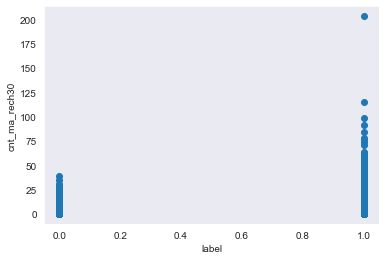

Scatterpot between label and cnt_ma_rech90


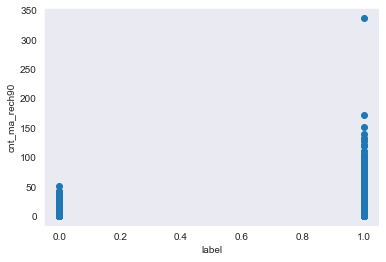

Scatterpot between cnt_ma_rech30 and cnt_ma_rech90


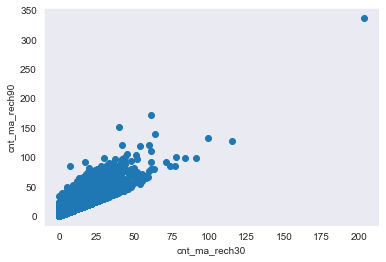

In [151]:
plot(x = 'label', y = 'cnt_ma_rech30', data = mic)
plot(x = 'label', y = 'cnt_ma_rech90', data = mic)
plot(x = 'cnt_ma_rech30', y = 'cnt_ma_rech90', data = mic)

Scatterpot between label and fr_ma_rech30


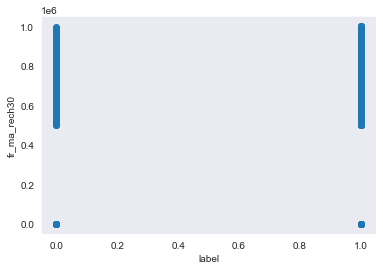

Scatterpot between label and fr_ma_rech90


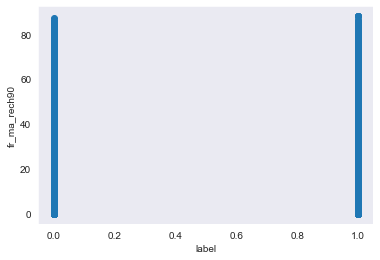

Scatterpot between fr_ma_rech30 and fr_ma_rech90


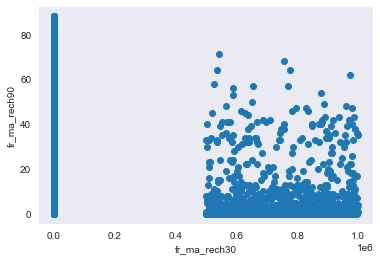

In [152]:
plot(x = 'label', y = 'fr_ma_rech30', data = mic)
plot(x = 'label', y = 'fr_ma_rech90', data = mic)
plot(x = 'fr_ma_rech30', y = 'fr_ma_rech90', data = mic)

Scatterpot between label and sumamnt_ma_rech30


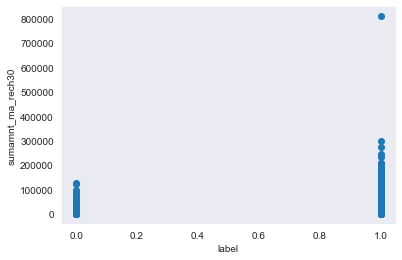

Scatterpot between label and sumamnt_ma_rech90


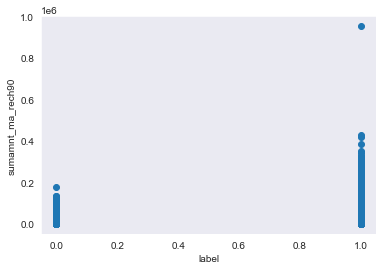

Scatterpot between sumamnt_ma_rech30 and sumamnt_ma_rech90


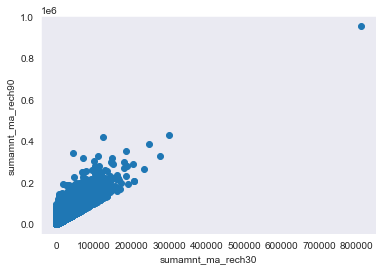

In [153]:
plot(x = 'label', y = 'sumamnt_ma_rech30', data = mic)
plot(x = 'label', y = 'sumamnt_ma_rech90', data = mic)
plot(x = 'sumamnt_ma_rech30', y = 'sumamnt_ma_rech90', data = mic)

Scatterpot between label and medianamnt_ma_rech30


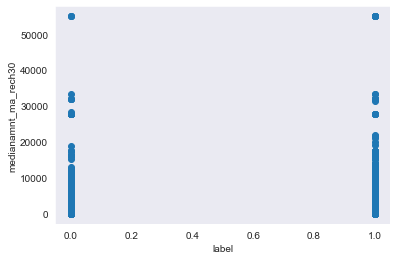

Scatterpot between label and medianamnt_ma_rech90


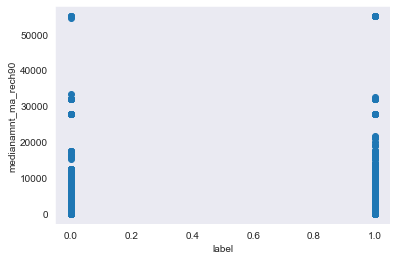

Scatterpot between medianamnt_ma_rech30 and medianamnt_ma_rech90


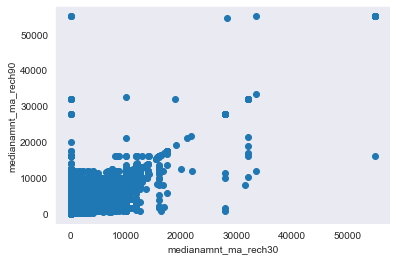

In [154]:
plot(x = 'label', y = 'medianamnt_ma_rech30', data = mic)
plot(x = 'label', y = 'medianamnt_ma_rech90', data = mic)
plot(x = 'medianamnt_ma_rech30', y = 'medianamnt_ma_rech90', data = mic)

Scatterpot between label and medianmarechprebal30


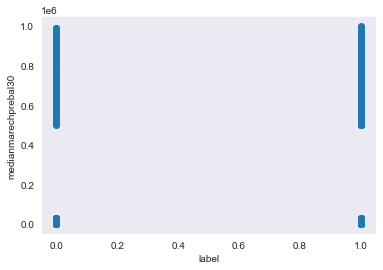

Scatterpot between label and medianmarechprebal90


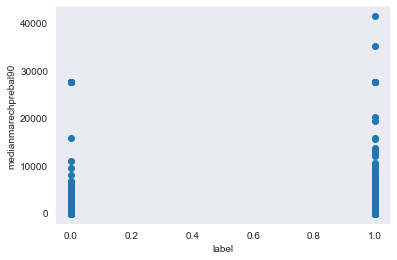

Scatterpot between medianmarechprebal30 and medianmarechprebal90


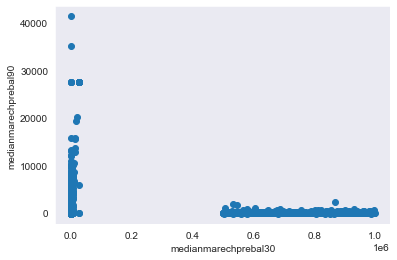

In [155]:
plot(x = 'label', y = 'medianmarechprebal30', data = mic)
plot(x = 'label', y = 'medianmarechprebal90', data = mic)
plot(x = 'medianmarechprebal30', y = 'medianmarechprebal90', data = mic)

Scatterpot between label and cnt_da_rech30


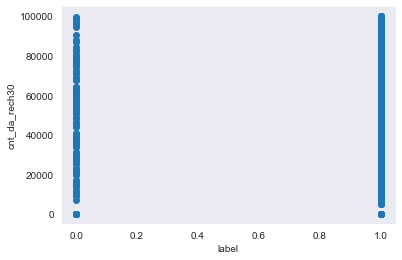

Scatterpot between label and cnt_da_rech90


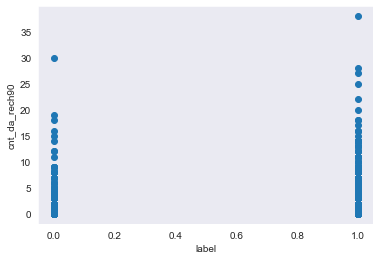

Scatterpot between cnt_da_rech30 and cnt_da_rech90


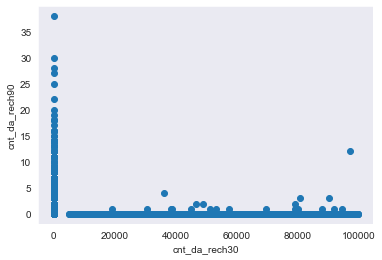

In [156]:
plot(x = 'label', y = 'cnt_da_rech30', data = mic)
plot(x = 'label', y = 'cnt_da_rech90', data = mic)
plot(x = 'cnt_da_rech30', y = 'cnt_da_rech90', data = mic)

Scatterpot between label and fr_da_rech30


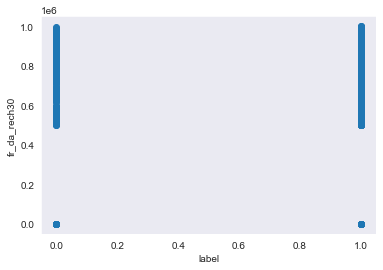

Scatterpot between label and fr_da_rech90


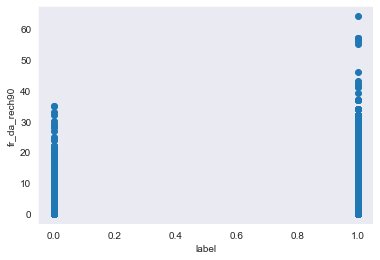

Scatterpot between fr_da_rech30 and fr_da_rech90


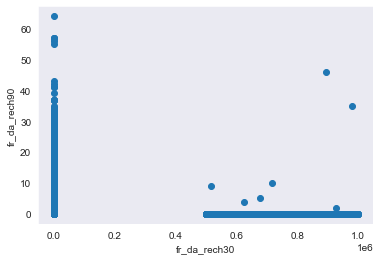

In [157]:
plot(x = 'label', y = 'fr_da_rech30', data = mic)
plot(x = 'label', y = 'fr_da_rech90', data = mic)
plot(x = 'fr_da_rech30', y = 'fr_da_rech90', data = mic)

Scatterpot between label and cnt_loans30


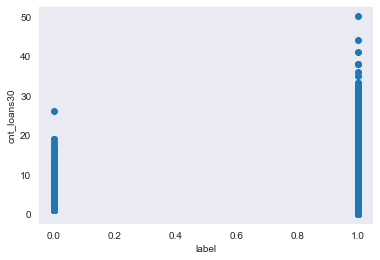

Scatterpot between label and cnt_loans90


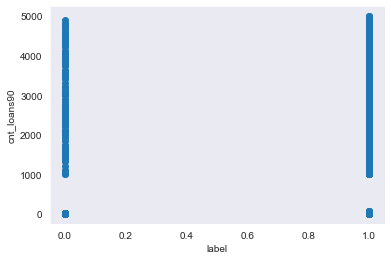

Scatterpot between cnt_loans30 and cnt_loans90


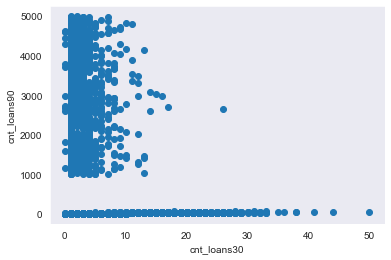

In [158]:
plot(x = 'label', y = 'cnt_loans30', data = mic)
plot(x = 'label', y = 'cnt_loans90', data = mic)
plot(x = 'cnt_loans30', y = 'cnt_loans90', data = mic)

Scatterpot between label and amnt_loans30


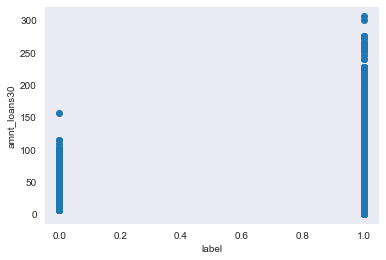

Scatterpot between label and amnt_loans90


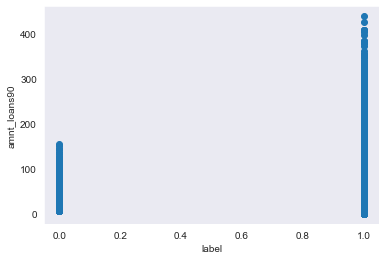

Scatterpot between amnt_loans30 and amnt_loans90


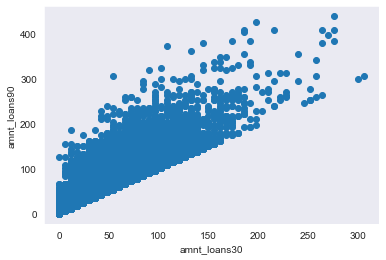

In [159]:
plot(x = 'label', y = 'amnt_loans30', data = mic)
plot(x = 'label', y = 'amnt_loans90', data = mic)
plot(x = 'amnt_loans30', y = 'amnt_loans90', data = mic)

Scatterpot between label and maxamnt_loans30


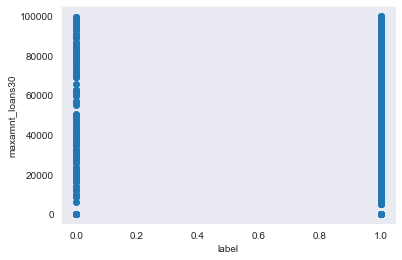

Scatterpot between label and maxamnt_loans90


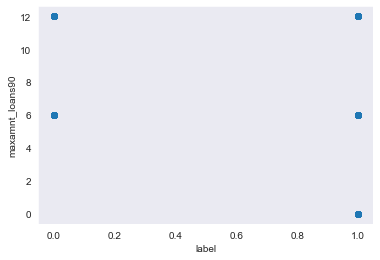

Scatterpot between maxamnt_loans30 and maxamnt_loans90


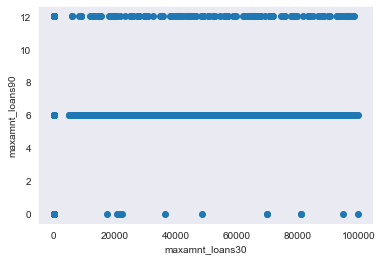

In [160]:
plot(x = 'label', y = 'maxamnt_loans30', data = mic)
plot(x = 'label', y = 'maxamnt_loans90', data = mic)
plot(x = 'maxamnt_loans30', y = 'maxamnt_loans90', data = mic)

Scatterpot between label and medianamnt_loans30


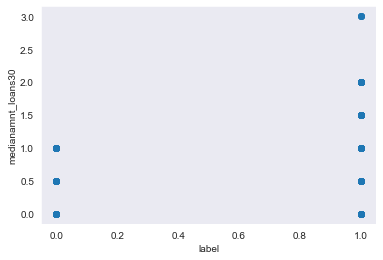

Scatterpot between label and medianamnt_loans90


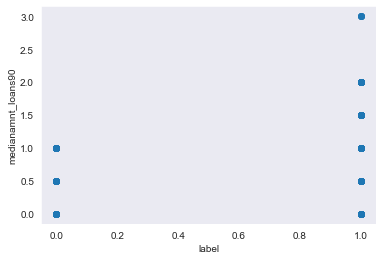

Scatterpot between medianamnt_loans30 and medianamnt_loans90


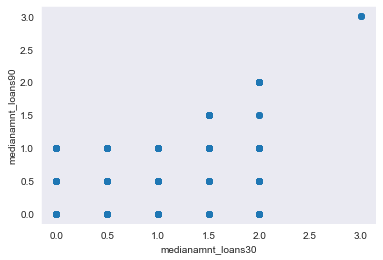

In [161]:
plot(x = 'label', y = 'medianamnt_loans30', data = mic)
plot(x = 'label', y = 'medianamnt_loans90', data = mic)
plot(x = 'medianamnt_loans30', y = 'medianamnt_loans90', data = mic)

Scatterpot between label and payback30


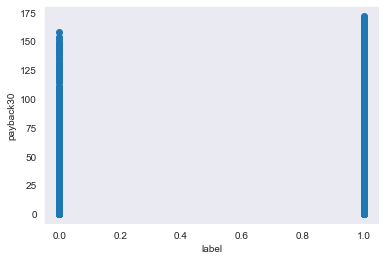

Scatterpot between label and payback90


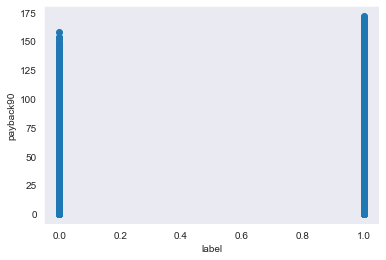

Scatterpot between payback30 and payback90


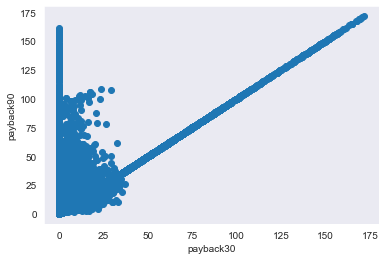

In [162]:
plot(x = 'label', y = 'payback30', data = mic)
plot(x = 'label', y = 'payback90', data = mic)
plot(x = 'payback30', y = 'payback90', data = mic)

## Correlation

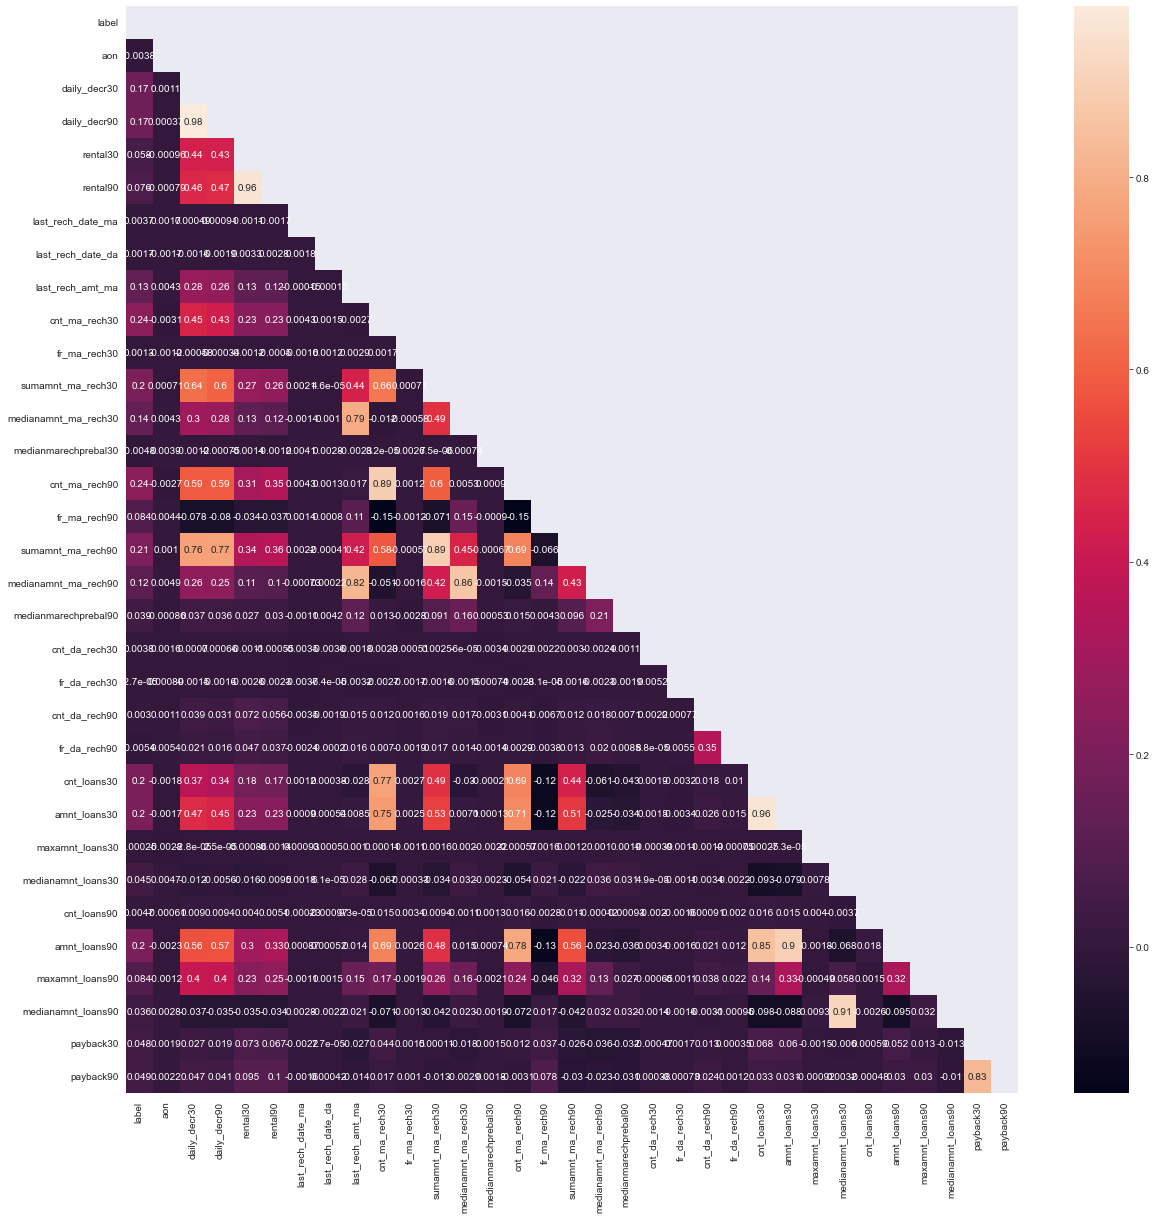

In [163]:
df = mic.corr()
mask = np.triu(np.ones_like(df))
plt.figure(figsize = (20,20))
sns.heatmap(df,annot = True,mask = mask)
plt.show()

Found That:
- daily_decr90 & daily_decr30 is 98% correlated.
- rental30 & rental90 is 96% correlated.
- cnt_ma_rech90 & cnt_ma_rech30 is 89% correlated.
- sumamnt_ma_rech30 & sumamnt_ma_rech90 is 89% correlated.
- medianamnt_ma_rech90 & medianamnt_ma_rech30 is 86% correlated.
- cnt_loans30 & amnt_loans30 is 96% correlated.
- amnt_loans90 & amnt_loans30 is 90% correlated.
- medianamnt_loans90 & medianamnt_loans30 is 91% correlated.
- payback30 & payback90 is 83% correlated.

**- Dropping all the correlation problem columns(which are correlated more than 80%).**

In [164]:
mic.drop(columns = ['daily_decr90','rental30','cnt_ma_rech90','sumamnt_ma_rech30','medianamnt_ma_rech90','cnt_loans30','amnt_loans90','medianamnt_loans90','payback30'],axis = 1,inplace = True)

## Feature Selection

**- Sepeating Features & Target.**

In [165]:
x = mic.drop('label',axis = 1)
y = mic.label

**- Applying SelectKBest.**

In [166]:
best_feature = SelectKBest(score_func = f_classif, k =23)
fit = best_feature.fit(x,y)

In [167]:
brt_score = pd.DataFrame(fit.scores_)
brt_column = pd.DataFrame(x.columns)

In [168]:
feature_score = pd.concat([brt_column,brt_score], axis = 1)
feature_score.columns = ['Feature Name','Scores']
feature_score.nlargest(32,'Scores')

,Feature Name,Scores
6,cnt_ma_rech30,12510.083303
11,sumamnt_ma_rech90,9268.913603
17,amnt_loans30,8486.771736
1,daily_decr30,6109.541601
8,medianamnt_ma_rech30,4281.623215
5,last_rech_amt_ma,3705.420270
10,fr_ma_rech90,1503.150310
21,maxamnt_loans90,1494.523796
2,rental90,1202.229543
22,payback90,508.224020


**Dropping all the columns whose score is less than 1.**

In [169]:
mic.drop(columns = ['last_rech_date_da','fr_ma_rech30','maxamnt_loans30','fr_da_rech30'],axis = 1,inplace = True)

## Normal Distribution

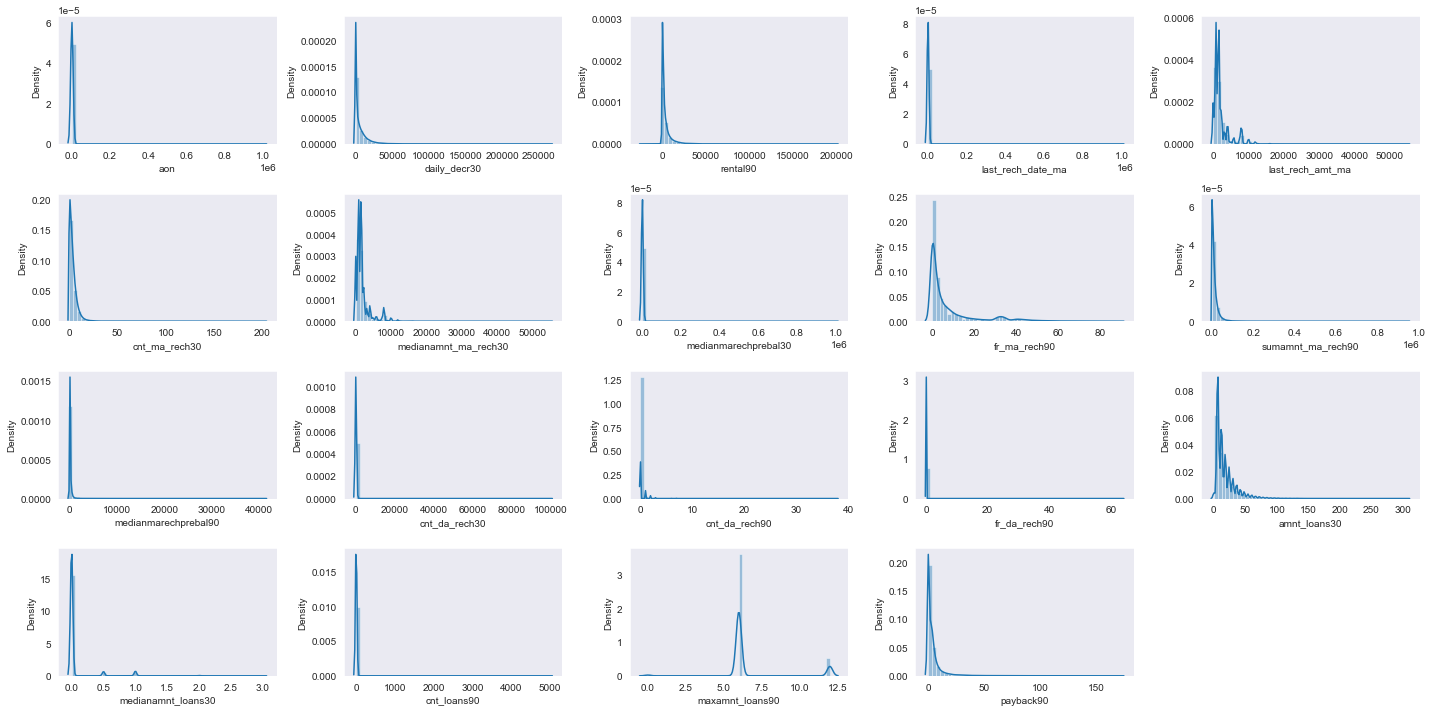

In [170]:
plt.figure(figsize=(20,10))
plotnumber = 1

for column in mic.drop('label',axis = 1):
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(mic[column])
        plt.xlabel(column)
    
    plotnumber+=1
plt.tight_layout()

Skewness is present in our dataset.

## Outliers

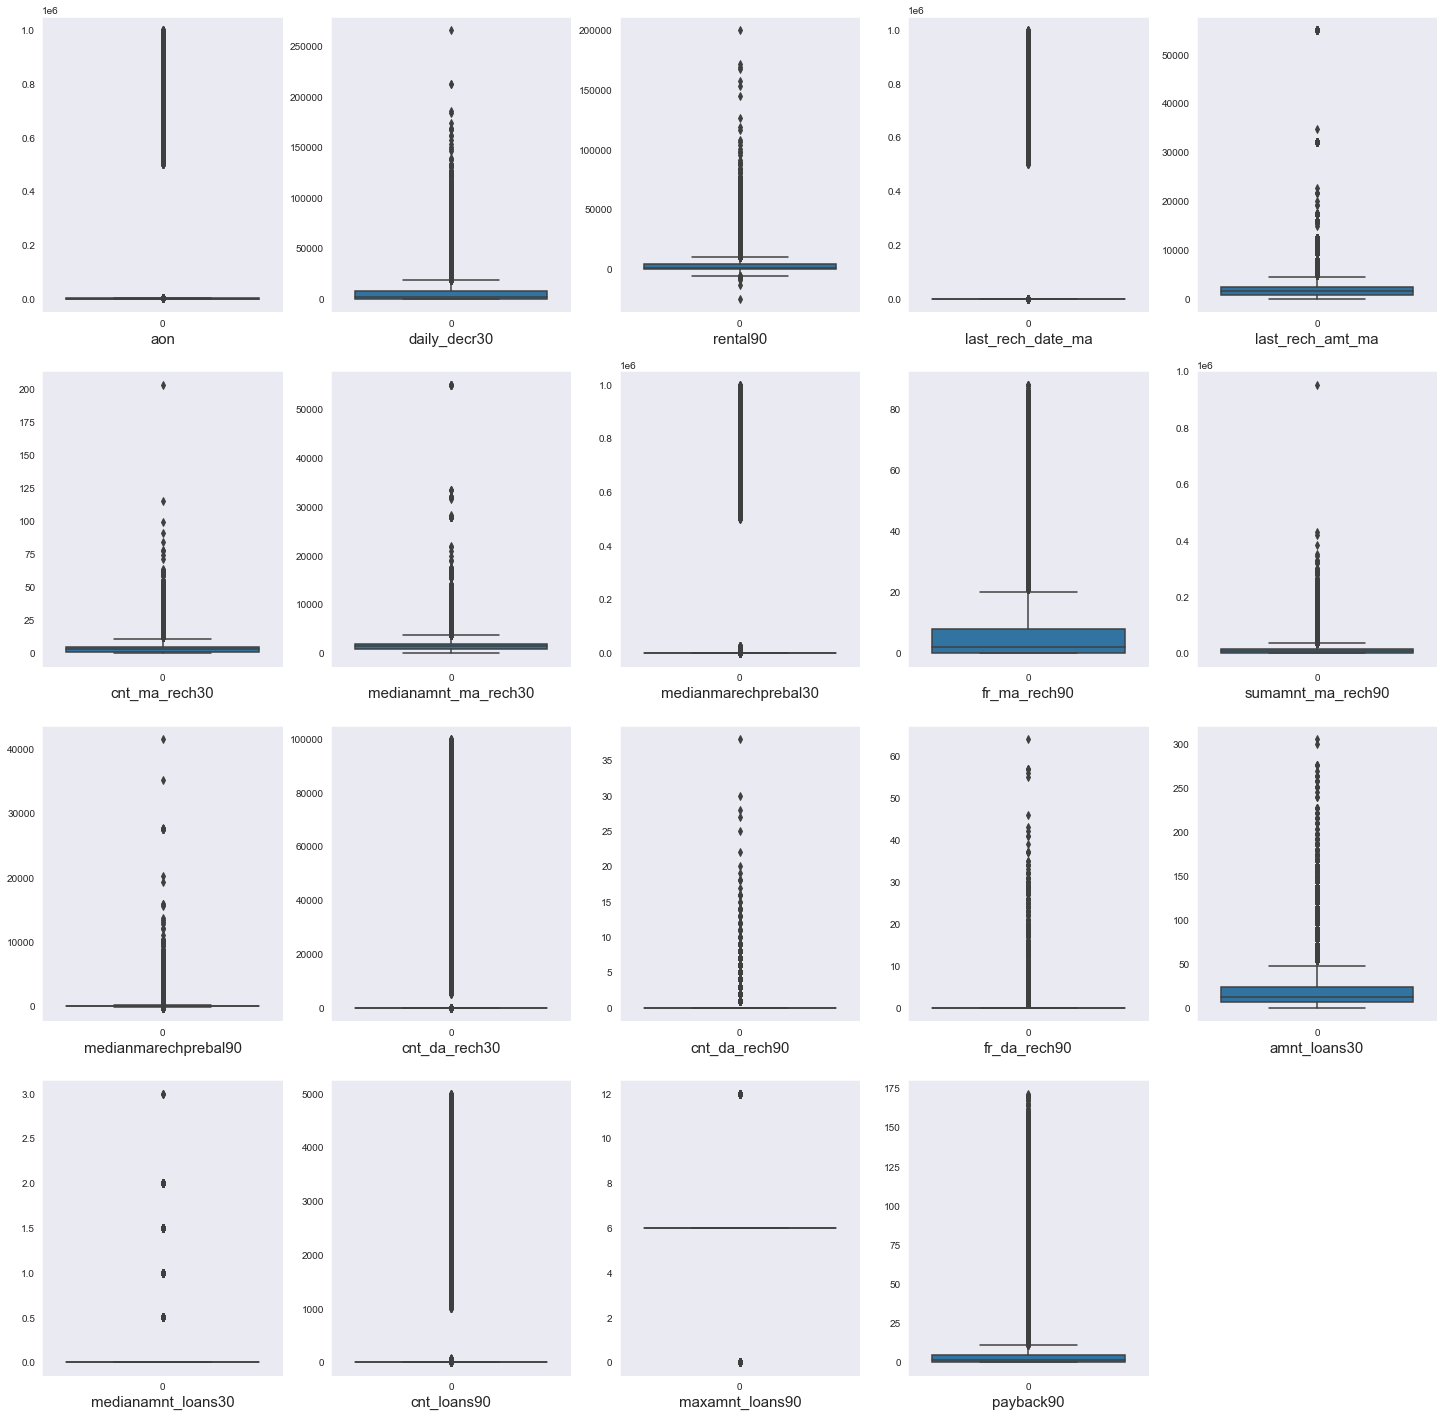

In [171]:
plt.figure(figsize = (25,25))
graph = 1
for column in mic.drop('label',axis = 1):
    if graph <= 20:
        plt.subplot(4,5,graph)
        ax = sns.boxplot(data = mic[column])
        plt.xlabel(column, fontsize = 15)
    graph += 1
plt.show()

So many outliers are there.

**- Code to remove outliers.**

In [ ]:
'''
x = mic.drop('label',axis = 1)
y = mic.label
z = np.abs(zscore(mic))
z.shape
threshold = 3
print(np.where(z>3))
len(np.where(z>3)[0])
mic_new = mic[(z<3).all(axis = 1)]
print('Old',mic.shape)
print('New',mic_new.shape)
loss = (209593 - 161465)/209593*100
print(loss,'%')
22.96%
'''

Not removing outliers because:
- Removing outliers may cause to data loss.
- Approx 22% of data is lost after outlier removal.
- Only 7% - 8% is allowed.

**- Transformation**

In [173]:
feature = [ 'aon', 'daily_decr30', 'rental90', 'last_rech_date_ma',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'cnt_da_rech90',
       'fr_da_rech90', 'amnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'maxamnt_loans90', 'payback90']

In [174]:
power = PowerTransformer(method = 'yeo-johnson')
mic[feature] = power.fit_transform(mic[feature].values)

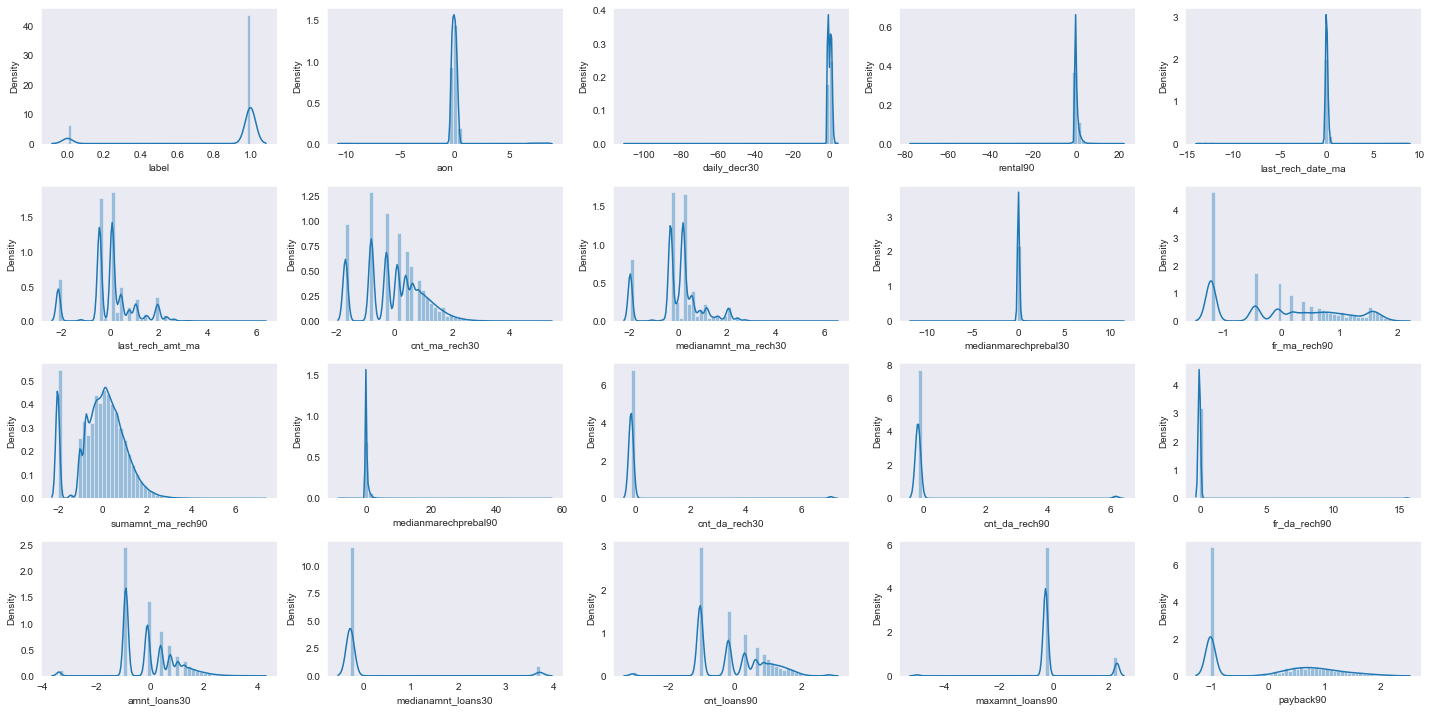

In [175]:
plt.figure(figsize=(20,10))
plotnumber = 1

for column in mic:
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(mic[column])
        plt.xlabel(column)
    
    plotnumber+=1
plt.tight_layout()

After applying powertransformation, our dataset seems to be fine for further.

## Imbalanced Target Columns

<AxesSubplot:xlabel='label', ylabel='count'>

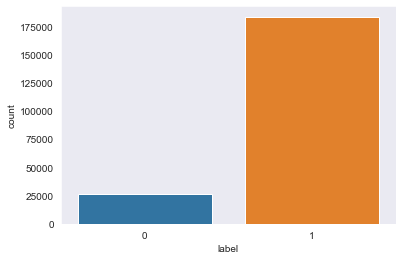

In [176]:
sns.countplot(mic['label'])

The target column is imbalanced.
- Label ‘1’ has approximately 87.5% records.
- Label ‘0’ has approximately 12.5% records.

**- Oversampling**

In [177]:
no = mic[mic.label == 0]
yes = mic[mic.label == 1]
no_oversampled = resample(no, replace=True, n_samples=len(yes), random_state=123)
os = pd.concat([yes, no_oversampled])

<AxesSubplot:xlabel='label', ylabel='count'>

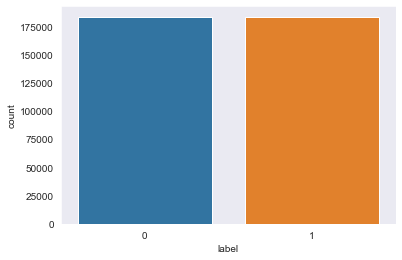

In [178]:
sns.countplot(os['label'])

Now, our target column is balanced.

## FINAL DATASET.

In [179]:
os

,label,aon,daily_decr30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,fr_ma_rech90,sumamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,cnt_da_rech90,fr_da_rech90,amnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback90
1,1,0.036453,1.116021,0.148082,0.191368,1.501277,-0.799355,1.632404,0.016926,-1.207069,-0.086685,-0.002722,-0.141497,-0.16211,-0.064375,-0.097563,-0.269051,-1.034294,2.325828,-1.018917
2,1,-0.034659,-0.007508,-0.409047,0.000044,0.083417,-0.799355,0.208594,0.020765,-1.207069,-0.760548,0.023770,-0.141497,-0.16211,-0.064375,-0.894782,-0.269051,-1.034294,-0.285611,-1.018917
3,1,-0.199213,-1.031486,-0.597731,0.299360,-0.291052,-1.694157,-1.961729,-0.063971,-1.207069,-0.949332,-0.370968,-0.141497,-0.16211,-0.064375,-0.097563,-0.269051,-0.186805,-0.285611,-1.018917
4,1,0.114880,-0.682337,-0.364212,0.021231,0.449550,0.992270,0.575164,-0.011178,-0.060965,0.974121,-0.142977,-0.141497,-0.16211,-0.064375,1.454951,-0.269051,1.180312,-0.285611,0.431438
5,1,-0.020350,0.192866,-0.535813,-0.025513,0.083417,0.384542,0.208594,-0.027945,-1.207069,0.395193,-0.029043,-0.141497,-0.16211,-0.064375,0.393236,-0.269051,0.300689,-0.285611,1.215290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137318,0,-0.136189,-0.212944,0.385058,-0.107221,-2.115772,-1.694157,-1.961729,-0.063971,-1.207069,-2.025016,-0.399841,-0.141497,-0.16211,-0.064375,-0.894782,-0.269051,-1.034294,-0.285611,-1.018917
18870,0,-0.105444,-0.218361,-0.239418,0.070105,-0.432065,-0.799355,-0.305859,-0.028529,1.641781,-0.579379,0.627290,-0.141497,-0.16211,-0.064375,-0.894782,-0.269051,-0.186805,-0.285611,-1.018917
201416,0,-0.139194,-0.119902,0.558764,0.400637,0.087772,-1.694157,-1.961729,-0.063971,-1.207069,-0.758385,-0.329979,-0.141497,-0.16211,-0.064375,-0.894782,-0.269051,-1.034294,-0.285611,-1.018917
88348,0,-0.196996,-1.093647,-0.630037,0.154056,0.083417,-0.799355,0.208594,0.039379,-1.207069,-0.760548,0.159941,-0.141497,-0.16211,-0.064375,-0.097563,-0.269051,-0.186805,-0.285611,-1.018917


## Model Building

**- Seperating the features and target.**

In [180]:
x = os.drop('label',axis =1)
y = os.label

**- Train Test Split.**

In [181]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 9)

**- Function for training & testing.**

In [182]:
def score(clas, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = clas.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_train,y_pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_train,y_pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_train,y_pred))
    
    elif train == False:
        pred = clas.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_test,pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_test,pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_test,pred))
        print('\n ----- Roc Curve ----- \n')
        plot_roc_curve(clas, x_test, y_test) 

**- Model instantiating.**

In [183]:
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
knn = KNeighborsClassifier()
gb = GradientBoostingClassifier()
lr = LogisticRegression()

**- RandomForest Classifier.**


 ----- Train Result ----- 

Accuracy Score: 0.9997564929164879

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    137763
           1       1.00      1.00      1.00    137383

    accuracy                           1.00    275146
   macro avg       1.00      1.00      1.00    275146
weighted avg       1.00      1.00      1.00    275146


 ----- Confusion matrix ----- 
 [[137763      0]
 [    67 137316]]

 ----- Test Result ----- 

Accuracy Score: 0.9766998124645645

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     45668
           1       1.00      0.96      0.98     46048

    accuracy                           0.98     91716
   macro avg       0.98      0.98      0.98     91716
weighted avg       0.98      0.98      0.98     91716


 ----- Confusion matrix ----- 
 [[45551   117]
 [ 2020 44028]]

 ----- Roc

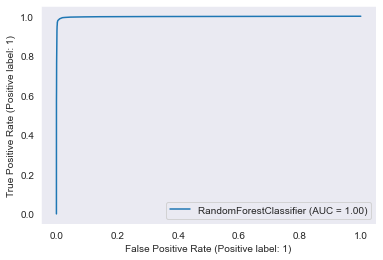

In [184]:
rf.fit(x_train,y_train)
score(rf, x_train,x_test,y_train,y_test,train = True)
score(rf, x_train,x_test,y_train,y_test,train = False)

**- AdaBoost Classifier.**


 ----- Train Result ----- 

Accuracy Score: 0.7866587193708068

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79    137763
           1       0.79      0.77      0.78    137383

    accuracy                           0.79    275146
   macro avg       0.79      0.79      0.79    275146
weighted avg       0.79      0.79      0.79    275146


 ----- Confusion matrix ----- 
 [[110088  27675]
 [ 31025 106358]]

 ----- Test Result ----- 

Accuracy Score: 0.7856644424091761

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79     45668
           1       0.79      0.78      0.78     46048

    accuracy                           0.79     91716
   macro avg       0.79      0.79      0.79     91716
weighted avg       0.79      0.79      0.79     91716


 ----- Confusion matrix ----- 
 [[36334  9334]
 [10324 35724]]

 ----- Roc

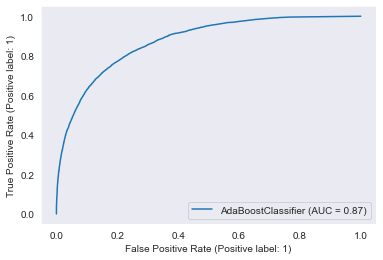

In [185]:
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)

**- KNeighbors Classifier.**


 ----- Train Result ----- 

Accuracy Score: 0.9199515893380241

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93    137763
           1       0.99      0.85      0.91    137383

    accuracy                           0.92    275146
   macro avg       0.93      0.92      0.92    275146
weighted avg       0.93      0.92      0.92    275146


 ----- Confusion matrix ----- 
 [[136434   1329]
 [ 20696 116687]]

 ----- Test Result ----- 

Accuracy Score: 0.8837825461206332

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.83      0.97      0.89     45668
           1       0.96      0.80      0.87     46048

    accuracy                           0.88     91716
   macro avg       0.90      0.88      0.88     91716
weighted avg       0.90      0.88      0.88     91716


 ----- Confusion matrix ----- 
 [[44322  1346]
 [ 9313 36735]]

 ----- Roc

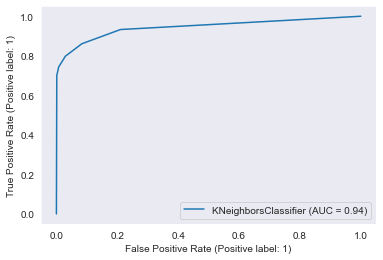

In [186]:
knn.fit(x_train,y_train)
score(knn, x_train,x_test,y_train,y_test,train = True)
score(knn, x_train,x_test,y_train,y_test,train = False)

**- GradientBoosting Classifier.**


 ----- Train Result ----- 

Accuracy Score: 0.8034752458694656

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.80      0.81      0.80    137763
           1       0.81      0.80      0.80    137383

    accuracy                           0.80    275146
   macro avg       0.80      0.80      0.80    275146
weighted avg       0.80      0.80      0.80    275146


 ----- Confusion matrix ----- 
 [[111571  26192]
 [ 27881 109502]]

 ----- Test Result ----- 

Accuracy Score: 0.8014414060796371

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.80      0.81      0.80     45668
           1       0.81      0.80      0.80     46048

    accuracy                           0.80     91716
   macro avg       0.80      0.80      0.80     91716
weighted avg       0.80      0.80      0.80     91716


 ----- Confusion matrix ----- 
 [[36806  8862]
 [ 9349 36699]]

 ----- Roc

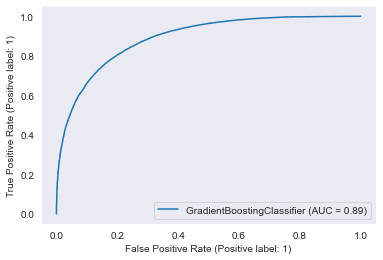

In [187]:
gb.fit(x_train,y_train)
score(gb, x_train,x_test,y_train,y_test,train = True)
score(gb, x_train,x_test,y_train,y_test,train = False)

**- Logistic Regression.**


 ----- Train Result ----- 

Accuracy Score: 0.7537271121513669

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.75      0.75      0.75    137763
           1       0.75      0.75      0.75    137383

    accuracy                           0.75    275146
   macro avg       0.75      0.75      0.75    275146
weighted avg       0.75      0.75      0.75    275146


 ----- Confusion matrix ----- 
 [[103950  33813]
 [ 33948 103435]]

 ----- Test Result ----- 

Accuracy Score: 0.7538161280474508

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.75      0.75      0.75     45668
           1       0.76      0.75      0.75     46048

    accuracy                           0.75     91716
   macro avg       0.75      0.75      0.75     91716
weighted avg       0.75      0.75      0.75     91716


 ----- Confusion matrix ----- 
 [[34419 11249]
 [11330 34718]]

 ----- Roc

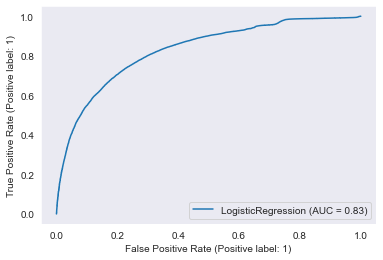

In [188]:
lr.fit(x_train,y_train)
score(lr, x_train,x_test,y_train,y_test,train = True)
score(lr, x_train,x_test,y_train,y_test,train = False)

        RandomForest Classifier, is giving the best score among all other models.

## Cross-Validation

In [189]:
k_f = KFold(n_splits = 5,shuffle = True)
k_f

KFold(n_splits=5, random_state=None, shuffle=True)

In [190]:
for train,test in k_f.split(mic):
    print('Train:',train,'\ntest:',test)

Train: [     0      1      2 ... 209589 209591 209592] 
test: [     3      7      9 ... 209560 209580 209590]
Train: [     1      2      3 ... 209590 209591 209592] 
test: [     0      5     14 ... 209582 209585 209588]
Train: [     0      1      2 ... 209589 209590 209591] 
test: [     8     17     18 ... 209584 209587 209592]
Train: [     0      1      2 ... 209590 209591 209592] 
test: [     4     11     13 ... 209583 209586 209589]
Train: [     0      3      4 ... 209589 209590 209592] 
test: [     1      2      6 ... 209575 209578 209591]


In [191]:
cross_val_score(rf,x,y,cv = 5).mean()

0.9791011331055042

    Cross Validation Score and model Accuracy score is very close, so we can say that our model is working well and doesn't having the overfitting/underfitting problem present.

**- Saving the Model.**

In [196]:
filename = 'micro.pickle'
pickle.dump(rf, open(filename, 'wb'))